In [1]:
# import library
from dateutil.parser import  parse
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
#plt.rcParams.update({'figure.figsize': (10,7), 'figure.dpi': 120})


In [2]:
# import as dataframe
df = pd.read_csv("https://raw.githubusercontent.com/xiaolancara/product_studio/master/sunspots2.csv",parse_dates=['Month'])                                                                                                   
df = df.rename(columns={'Month' : 'Date'})
df.tail(100)

,Sunspots,Date
908,13.9,1975-09-01
909,9.1,1975-10-01
910,19.4,1975-11-01
911,7.8,1975-12-01
912,8.1,1976-01-01
...,...,...
1003,71.8,1983-08-01
1004,50.3,1983-09-01
1005,55.8,1983-10-01
1006,33.3,1983-11-01


In [3]:
df.head(50)

,Sunspots,Date
0,9.4,1900-01-01
1,13.6,1900-02-01
2,8.6,1900-03-01
3,16.0,1900-04-01
4,15.2,1900-05-01
5,12.1,1900-06-01
6,8.3,1900-07-01
7,4.3,1900-08-01
8,8.3,1900-09-01
9,12.9,1900-10-01


In [4]:
# # draw plot
# def plot_df(df, x, y, title="",xlabel="Date", ylabel="Sunspots Number", dpi=100):
#     plt.figure(figsize=(10,5),dpi=dpi)
#     plt.plot(x, y, color = 'tab:red')    
#     plt.tick_params(labelsize=13)
#     plt.title(title,fontdict={'weight':'normal','size': 20}) 
#     plt.xlabel(xlabel, fontdict={'weight': 'normal', 'size': 16})
#     plt.ylabel(ylabel, fontdict={'weight': 'normal', 'size': 16})
#     #plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

# plot_df(df,x=df.Date, y=df.Sunspots,title = 'Monthly Mean Total Sunspot Number')

Creating a new column called nth_year where each value in the column is an integer which represents 1 if it is 1st year of the decade or 2 if it is 2nd year of the decade and so on. This column is created to analyze if any seasonality exists in the data for 25 decades.

In [5]:
# # prepare data
# df['nth_year'] = [str(d)[3] for d in df.Date]
# df['nth_year']=df['nth_year'].replace('0','10')
# df['nth_year'] = df['nth_year'].astype(float)
# #plt.plot(df['Sunspots'])

# df



In [6]:
# # Extracting year and month from the Date column.
# df['year'] = [d.year for d in df.Date]
# df['month'] = [d.strftime('%b') for d in df.Date]
# years = df['year'].unique()
# df

Now we have to observe the trend and seasonality clearly. For that we use boxlots.

In [7]:
# fig, axes = plt.subplots(3, 1, figsize = (10,6),dpi = 80)
# y = sns.boxplot(x='year',y='Sunspots',data=df, ax = axes[0])
# n_y = sns.boxplot(x='nth_year',y='Sunspots',data=df, ax = axes[1])
# m = sns.boxplot(x='month',y='Sunspots',data=df, ax = axes[2])
# y.set_xlabel('year', fontsize=12)
# n_y.set_xlabel('nth_year', fontsize=12)
# m.set_xlabel('month', fontsize=12)
# #set title
# axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
# axes[1].set_title('Nth_year-wise Box Plot\n(The Seasonality)', fontsize=18)
# axes[2].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

# plt.tight_layout()
# plt.show()

In [8]:
df.set_index('Date',inplace=True)
df

,Sunspots
Date,
1900-01-01,9.4
1900-02-01,13.6
1900-03-01,8.6
1900-04-01,16.0
1900-05-01,15.2
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


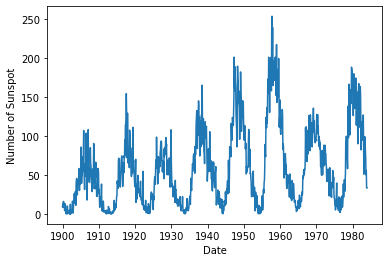

In [9]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Number of Sunspot')
plt.plot(df)

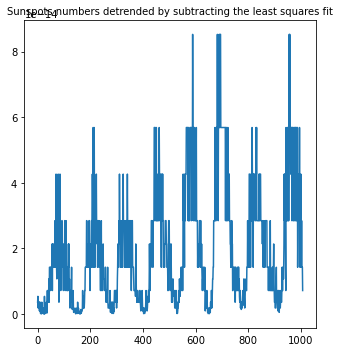

In [10]:
from scipy import signal

detrended = signal.detrend(df.values)
plt.figure(figsize=(5,5))

plt.title('Sunspots numbers detrended by subtracting the least squares fit', fontsize=10)
plt.plot(detrended)
plt.tight_layout()
plt.show()

In [11]:
#Determine rolling statistics
rolmean = df.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df.rolling(window=12).std()
print(rolmean,rolstd)

             Sunspots
Date                 
1900-01-01        NaN
1900-02-01        NaN
1900-03-01        NaN
1900-04-01        NaN
1900-05-01        NaN
...               ...
1983-08-01  88.783333
1983-09-01  83.075000
1983-10-01  79.833333
1983-11-01  74.433333
1983-12-01  66.633333

[1008 rows x 1 columns]              Sunspots
Date                 
1900-01-01        NaN
1900-02-01        NaN
1900-03-01        NaN
1900-04-01        NaN
1900-05-01        NaN
...               ...
1983-08-01  21.188626
1983-09-01  21.590155
1983-10-01  22.583515
1983-11-01  25.391349
1983-12-01  21.913729

[1008 rows x 1 columns]


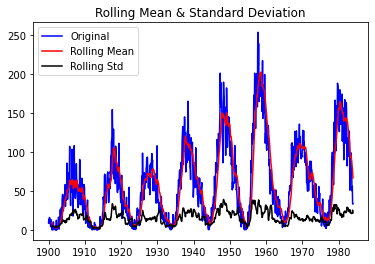

In [12]:
#Plot rolling statistics
def Plot_rolling_statistics():    
    orig = plt.plot(df, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
Plot_rolling_statistics()

In [13]:
from statsmodels.tsa.stattools import adfuller, kpss

def ADF_test():
    # ADF Test
    result = adfuller(df.Sunspots.values, autolag='AIC')
    print(f'ADF Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
def KPSS_test():
    # KPSS Test
    result = kpss(df.Sunspots.values, regression='c')
    print('\nKPSS Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

ADF_test()
KPSS_test()

ADF Test Statistic: -5.657955854164512
p-value: 9.524461009602313e-07
Critial Values:
   1%, -3.4369860032923145
Critial Values:
   5%, -2.8644697838498376
Critial Values:
   10%, -2.5683299626694422

KPSS Test Statistic: 0.809572
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\xiaon\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\xiaon\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\xiaon\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


From the above result, we can tell:
1. the p-value is 0.00000095, which is super near 0.
2. the ADF Test Statistic is lower than Critical Value and KPSS Test Statistic is higher than Critical Value.<br>
So we reject the null hypothesis. The test result is stationary.

In [14]:
# #Perform Augmented Dickey–Fuller test:
# print('Results of Dickey Fuller Test:')
# dftest = adfuller(df['Sunspots'], autolag='AIC')

# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value
    
# print(dfoutput)

<ipython-input-15-1caeedbb3e2d>:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add = seasonal_decompose(df,model = 'additive',extrapolate_trend = 'freq',freq=96)


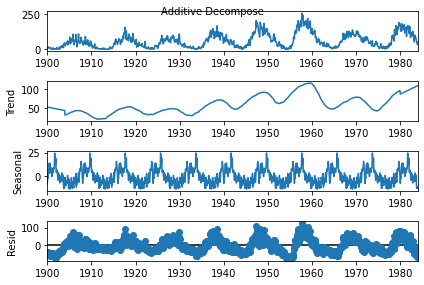

<Figure size 360x360 with 0 Axes>

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
#Multiplicative Decomposition
#result_mul = seasonal_decompose(df['Sunspots'],model='multiplicative', extrapolate_trend='freq')

#Additive Decomposition
result_add = seasonal_decompose(df,model = 'additive',extrapolate_trend = 'freq',freq=96)

# Plot
result_add.plot().suptitle('Additive Decompose', fontsize=10)
plt.figure(figsize=(5,5))
#result_mul.plot().suptitle('multiplicative Decompose', fontsize=22)



plt.tight_layout()
plt.show()

In [16]:
def test_stationarity(timeseries):    
    Plot_rolling_statistics()
    ADF_test()

<ipython-input-17-123dc16e930b>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-17-123dc16e930b>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


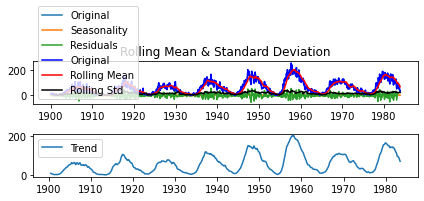

ADF Test Statistic: -5.657955854164512
p-value: 9.524461009602313e-07
Critial Values:
   1%, -3.4369860032923145
Critial Values:
   5%, -2.8644697838498376
Critial Values:
   10%, -2.5683299626694422


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedData = residual
decomposedData.dropna(inplace=True)
test_stationarity(decomposedData)

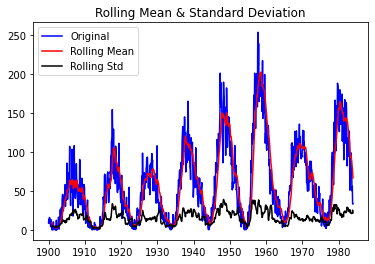

ADF Test Statistic: -5.657955854164512
p-value: 9.524461009602313e-07
Critial Values:
   1%, -3.4369860032923145
Critial Values:
   5%, -2.8644697838498376
Critial Values:
   10%, -2.5683299626694422


In [18]:
decomposedData = residual
decomposedData.dropna(inplace=True)
test_stationarity(decomposedData)

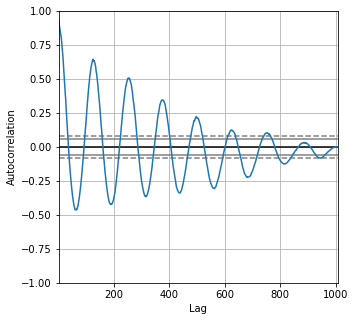

In [19]:
from pandas.plotting import autocorrelation_plot


# Draw Plot
fig = plt.figure(figsize = (5,5))
autocorrelation_plot(df)
plt.show()

## Plotting ACF & PACF

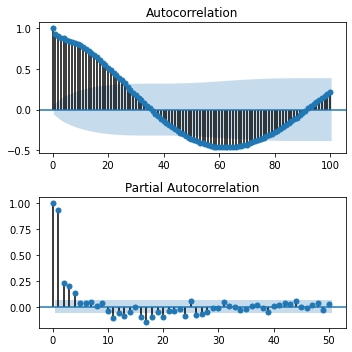

In [20]:
#ACF & PACF plots
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

# Draw Plot
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df,lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,lags=50,ax=ax2)

plt.tight_layout()
plt.show()

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2 From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

## Holt Winter's Model

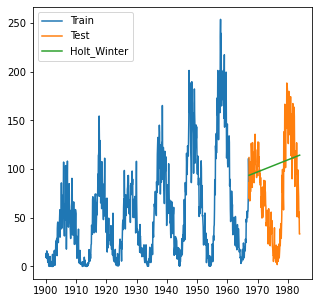

In [21]:
from statsmodels.tsa.holtwinters import Holt

count = int(df.shape[0]*0.8)
Train = df[:count]
Test = df[count:]

y_hat_avg = Test.copy()
fit1 = Holt(np.asarray(Train['Sunspots'])).fit()
y_hat_avg['Holt_Winter'] = fit1.predict(start=count+1,end=df.shape[0])
plt.figure(figsize=(5,5))
plt.plot(Train.index, Train['Sunspots'], label='Train')
plt.plot(Test.index,Test['Sunspots'], label='Test')
plt.plot(y_hat_avg.index,y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
# plt.savefig('Holt_Winters.jpg')

## Holt Winter's using exponential smoothing

In [22]:
new = df[['Sunspots']]
new

,Sunspots
Date,
1900-01-01,9.4
1900-02-01,13.6
1900-03-01,8.6
1900-04-01,16.0
1900-05-01,15.2
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


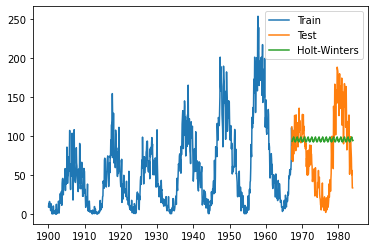

In [23]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

new = new.resample('M').last() # Start of the month
Train, Test = new.iloc[:count, 0], df.iloc[count:, 0]

model = ExponentialSmoothing(Train, trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_model = model.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred = hw_model.predict(start=Test.index[0], end=Test.index[-1])

plt.plot(Train.index, Train, label='Train')
plt.plot(Test.index, Test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best');

## ARMA Model

C:\Users\xiaon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


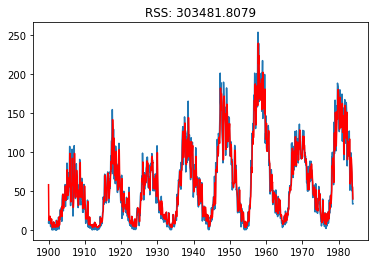

In [24]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(df, order=(2,0,0))
results_AR = model.fit(disp=-1)
plt.plot(df)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df['Sunspots'])**2))
print('Plotting AR model')

C:\Users\xiaon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting MA model


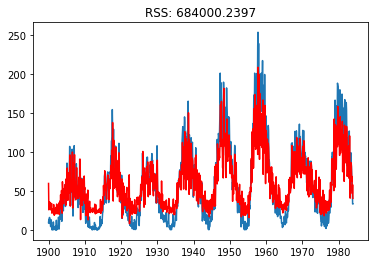

In [25]:
#MA Model
model = ARIMA(df, order=(0,0,2))
results_MA = model.fit(disp=-1)
plt.plot(df)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - df['Sunspots'])**2))
print('Plotting MA model')

C:\Users\xiaon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting ARIMA model


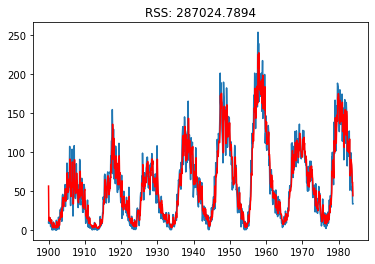

In [26]:
# AR+I+MA = ARIMA model
model = ARIMA(df, order=(2,0,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(df)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df['Sunspots'])**2))
print('Plotting ARIMA model')

In [27]:
# import warnings
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # evaluate an ARIMA model for a given order (p,d,q) and return RMSE
# def evaluate_arima_model(X, arima_order):
#     # prepare training dataset
#     X = X.astype('float32')
#     train_size = int(len(X) * 0.50)
#     train, test = X[0:train_size], X[train_size:]
#     history = [x for x in train]
#     # make predictions
#     predictions = list()
#     for t in range(len(test)):
#         model = ARIMA(history, order=arima_order)
#         model_fit = model.fit(disp=0)
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test[t])
#     # calculate out of sample error
#     mse = mean_squared_error(test, predictions)
#     rmse = sqrt(mse)
#     return rmse

# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
#     dataset = dataset.astype('float32')
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:        
#             for q in q_values:
#                 order = (p,d_values,q)
#                 try:
#                     mse = evaluate_arima_model(dataset, order)
#                     if mse < best_score:
#                         best_score, best_cfg = mse, order
#                     print('ARIMA%s MSE=%.3f' % (order,mse))
#                 except:
#                     continue
#     print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


# # evaluate parameters
# p_values = range(1,3)
# d_values = 0
# q_values = range(1, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(df.values, p_values, d_values, q_values)

## Prediction

In [28]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# prepare data
X = df.values
X = X.astype('float')
train_size = df.index.get_loc('1973-01-01')
train_size
#train_size = int(len(X) * 0.50)
train, test = X[:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
#predict
predictions = list() 
for i in range(len(test)):
    model = ARIMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
df

>Predicted=50.534, Expected= 43
>Predicted=46.746, Expected= 43
>Predicted=45.356, Expected= 46
>Predicted=46.467, Expected= 58
>Predicted=53.832, Expected= 42
>Predicted=44.857, Expected= 40
>Predicted=43.077, Expected= 23
>Predicted=31.021, Expected= 26
>Predicted=30.624, Expected= 59
>Predicted=50.497, Expected= 31
>Predicted=33.749, Expected= 24
>Predicted=30.399, Expected= 23
>Predicted=27.560, Expected= 28
>Predicted=29.017, Expected= 26
>Predicted=27.471, Expected= 21
>Predicted=24.314, Expected= 40
>Predicted=36.041, Expected= 40
>Predicted=36.372, Expected= 36
>Predicted=35.921, Expected= 56
>Predicted=49.182, Expected= 34
>Predicted=36.405, Expected= 40
>Predicted=41.287, Expected= 47
>Predicted=44.748, Expected= 25
>Predicted=31.311, Expected= 20
>Predicted=27.417, Expected= 19
>Predicted=23.826, Expected= 12
>Predicted=17.490, Expected= 12
>Predicted=15.892, Expected=  5
>Predicted=10.313, Expected=  9
>Predicted=11.650, Expected= 11
>Predicted=12.350, Expected= 28
>Predict

,Sunspots
Date,
1900-01-01,9.4
1900-02-01,13.6
1900-03-01,8.6
1900-04-01,16.0
1900-05-01,15.2
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


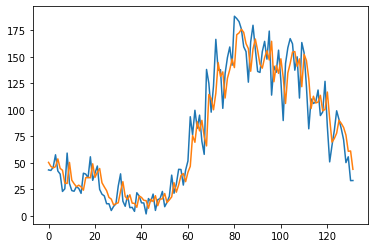

In [29]:
plt.plot(test)
plt.plot(predictions)